<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据prepare" data-toc-modified-id="数据prepare-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据prepare</a></span></li><li><span><a href="#逻辑回归算法实现" data-toc-modified-id="逻辑回归算法实现-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>逻辑回归算法实现</a></span></li><li><span><a href="#混淆矩阵" data-toc-modified-id="混淆矩阵-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>混淆矩阵</a></span></li><li><span><a href="#准确率（Accuracy）" data-toc-modified-id="准确率（Accuracy）-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>准确率（Accuracy）</a></span></li><li><span><a href="#精确率（Precison）" data-toc-modified-id="精确率（Precison）-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>精确率（Precison）</a></span></li><li><span><a href="#召回率（Recall）" data-toc-modified-id="召回率（Recall）-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>召回率（Recall）</a></span></li><li><span><a href="#F1值" data-toc-modified-id="F1值-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>F1值</a></span></li><li><span><a href="#ROC曲线" data-toc-modified-id="ROC曲线-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>ROC曲线</a></span></li><li><span><a href="#AUC计算" data-toc-modified-id="AUC计算-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>AUC计算</a></span></li></ul></div>

## 数据prepare

数据集包含 10 列特征，以及一列类别标签。其中：
- 第 1 ～ 6 列为客户近期历史账单信息。（特征）
- 第 7 列为该客户年龄。（特征）
- 第 8 列为该客户性别。（特征）
- 第 9 列为该客户教育程度。（特征）
- 第 10 列为该客户婚姻状况。（特征）
- 第 11 列为客户持卡风险状况。（分类标签：LOW, HIGH）

In [1]:
import pandas as pd

df = pd.read_csv("../data/credit_risk_train.csv")  # 读取数据文件
df.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,Female,Graduate School,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,Male,High School,Single,HIGH
2,628,662,596,630,664,598,39,Male,Graduate School,Married,HIGH
3,4649,3964,3281,934,467,12871,41,Female,Graduate School,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,Female,High School,Married,HIGH


In [2]:
df["RISK"].unique()

array(['LOW', 'HIGH'], dtype=object)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

# 将分类标签替换为数值，方便后面计算
df.RISK = df.RISK.replace({"LOW": 0, "HIGH": 1})

# 获取特征数据列
train_data = df.iloc[:, :-1]

# 字符串类型的特征 => 独热编码
train_data = pd.get_dummies(train_data)

# 规范化处理
train_data = scale(train_data)

# label
train_target = df['RISK']

# 划分数据集，训练集占 70%，测试集占 30%
X_train, X_test, y_train, y_test = train_test_split(
    train_data, train_target, test_size=0.3, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14000, 16), (6000, 16), (14000,), (6000,))

## 逻辑回归算法实现

In [14]:
from sklearn.linear_model import LogisticRegression

# 定义逻辑回归模型
model = LogisticRegression(solver='lbfgs')

# 使用训练数据完成模型训练
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)  # 输入测试集特征数据得到预测结果
y_pred

array([1, 1, 1, ..., 1, 1, 1])

## 混淆矩阵

定义正类和负类，例如这里我们定 HIGH 为 正类，LOW 为负类，可以得到以下混淆矩阵：

| 信用风险 |        HIGH         |         LOW         |
| :------: | :-----------------: | :-----------------: |
|   HIGH   | True Positive (TP)  | False Negative (FN) |
|   LOW    | False Positive (FP) | True Negative (TN)  |

上表含义：
- TP：将正类预测为正类数 → 预测正确
- TN：将负类预测为负类数 → 预测正确
- FP：将负类预测为正类数 → 预测错误
- FN：将正类预测为负类数 → 预测错误

## 准确率（Accuracy）
$$
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

In [12]:
import numpy as np

def get_accuracy(test_labels, pred_lables):
    # 准确率计算公式，根据公式 2 实现
    correct = np.sum(test_labels == pred_lables)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    acc = correct / n
    return acc

get_accuracy(y_test, y_pred)

0.7678333333333334

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)  # 传入真实类别和预测类别

0.7678333333333334

In [15]:
model.score(X_test, y_test)

0.7678333333333334

## 精确率（Precison）

正确分类的正例个数占预估为正例的总数的比例。

$$
Precison = \frac{TP}{TP+FP}
$$

In [17]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7678333333333334

## 召回率（Recall）

正确分类的正例个数占实际正例总数的比例。
$$
Recall = \frac{TP}{TP+FN}
$$

In [19]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

1.0

## F1值
F1值是召回率和准确率的加权平均数。
$$
F1 = \frac{2 \cdot Precison \cdot Rrecall} {Precison + Recall}
$$

In [22]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.8686716319411709

## ROC曲线

分类模型中，通常会设定一个阈值，并规定大于该阈值为正类，小于则为负类。所以，当我们减小阀值时，将会有更多的样本被划分到正类。这样会提高正类的识别率，但同时也会使得更多的负类被错误识别为正类。ROC 曲线的目的在用形象化该变化过程，从而评价一个分类器好坏。

横轴：
$$
FPR = \frac{FP}{FP+TN}
$$

纵轴：
$$
TPR = \frac{TP}{TP+FN}
$$

代码示例：

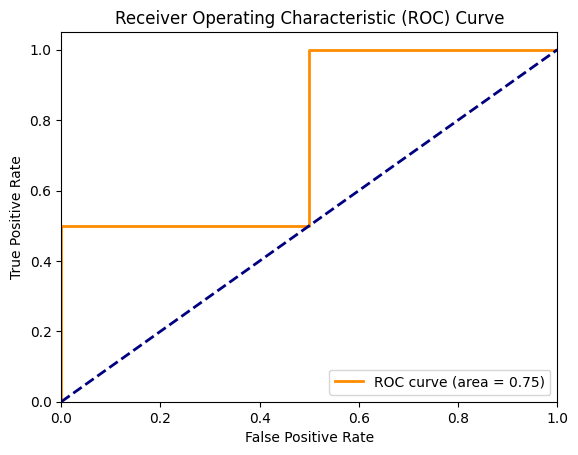

In [30]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline


# 生成一些示例数据
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

# 计算ROC曲线的参数
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

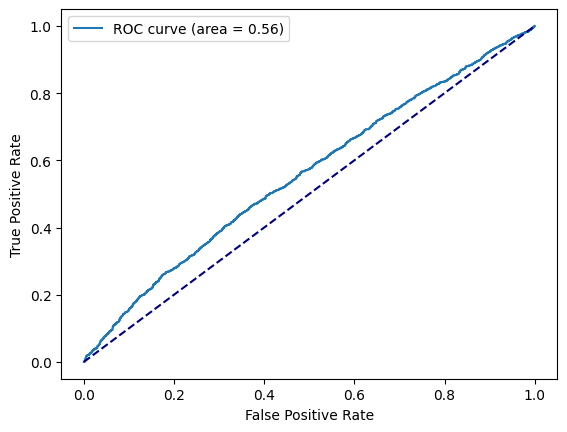

In [31]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline


# 计算样本打分
y_score = model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## AUC计算

工业界数据量通常都比较大，常用的计算AUC的方式如下（阈值为0.5）：

In [35]:
def auc(data):
    """计算auc"""
    data_sort = sorted(data.items(), key=lambda x: x[0], reverse=True)
    ack = [x[1][0] for x in data_sort]
    clk = [x[1][1] for x in data_sort]
    sample_num = sum(ack)
    pos = sum(clk)
    neg = sample_num - pos
    if pos < 1 or neg < 1:
        return 0
    roc_arr = []
    tp = fp = 0
    for i, j in zip(ack, clk):
        tp += j
        fp += (i - j)
        roc_arr.append((float(fp) / neg, float(tp) / pos))
    auc = 0
    prev_x = 0
    for x, y in roc_arr:
        auc += (x - prev_x) * y
        prev_x = x
    return round(auc, 5)

# 打分分桶: [到达量, 点击量]
data = {
    "0.1000": [1, 0],
    "0.4000": [1, 0],
    "0.3500": [1, 1],
    "0.8000": [1, 1]
}

auc(data)

0.75